In [ ]:
import pandas as pd
import numpy as np;
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
worldHappiness_df=pd.read_csv('/content/drive/MyDrive/assignment1/World Happiness Report.csv');


**Problem-1. Data Exploration and Understanding**

1.Dataset Overview

In [ ]:
worldHappiness_df.head((10))

,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
0,Finland,7.741,1.844,1.572,0.695,0.859,0.142,0.546,2.082
1,Denmark,7.583,1.908,1.520,0.699,0.823,0.204,0.548,1.881
2,Iceland,7.525,1.881,1.617,0.718,0.819,0.258,0.182,2.050
3,Sweden,7.344,1.878,1.501,0.724,0.838,0.221,0.524,1.658
4,Israel,7.341,1.803,1.513,0.740,0.641,0.153,0.193,2.298
5,Netherlands,7.319,1.901,1.462,0.706,0.725,0.247,0.372,1.906
6,Norway,7.302,1.952,1.517,0.704,0.835,0.224,0.484,1.586
7,Luxembourg,7.122,2.141,1.355,0.708,0.801,0.146,0.432,1.540
8,Switzerland,7.060,1.970,1.425,0.747,0.759,0.173,0.498,1.488
9,Australia,7.057,1.854,1.461,0.692,0.756,0.225,0.323,1.745


In [ ]:
rows, cols = worldHappiness_df.shape
rows, cols

(143, 9)

In [ ]:
worldHappiness_df.dtypes

,0
Country name,object
score,float64
Log GDP per capita,float64
Social support,float64
Healthy life expectancy,float64
Freedom to make life choices,float64
Generosity,float64
Perceptions of corruption,float64
Dystopia + residual,float64


Basic Statics

In [ ]:
mean=worldHappiness_df["score"].mean()
median=worldHappiness_df["score"].median()
stdev=worldHappiness_df["score"].std()

print("Mean: ",mean,"Median: ",median,"Standard Deviation: ",stdev)

Mean:  5.52758041958042 Median:  5.785 Standard Deviation:  1.1707165099442995


In [ ]:
highest=worldHappiness_df.loc[worldHappiness_df["score"].idxmax(), 'Country name']
lowest = worldHappiness_df.loc[worldHappiness_df["score"].idxmin(), 'Country name']
print("Highest happiness score is of ", highest)
print("Lowest happiness score is of ", lowest)

Highest happiness score is of  Finland
Lowest happiness score is of  Afghanistan


Missing values


In [ ]:
missing=worldHappiness_df.isnull().sum()
print("Missing values per column:")
print(missing)

Missing values per column:
Country name                    0
score                           0
Log GDP per capita              3
Social support                  3
Healthy life expectancy         3
Freedom to make life choices    3
Generosity                      3
Perceptions of corruption       3
Dystopia + residual             3
dtype: int64


Filtering and sorting

In [ ]:
filtered=worldHappiness_df[worldHappiness_df["score"]>7.5]
filtered

,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
0,Finland,7.741,1.844,1.572,0.695,0.859,0.142,0.546,2.082
1,Denmark,7.583,1.908,1.520,0.699,0.823,0.204,0.548,1.881
2,Iceland,7.525,1.881,1.617,0.718,0.819,0.258,0.182,2.050


In [ ]:
sorted = filtered.sort_values(by='Log GDP per capita', ascending=False)
sorted.head((10))

,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
1,Denmark,7.583,1.908,1.520,0.699,0.823,0.204,0.548,1.881
2,Iceland,7.525,1.881,1.617,0.718,0.819,0.258,0.182,2.050
0,Finland,7.741,1.844,1.572,0.695,0.859,0.142,0.546,2.082


In [ ]:
conditions = [
    worldHappiness_df['score'] <4,
    (worldHappiness_df['score']>=4) & (worldHappiness_df["score"]<=6),
    worldHappiness_df['score'] >6
]

categories=['Low','Medium','High']

worldHappiness_df["Happiness Category"] = np.select(conditions, categories)

worldHappiness_df.head()

,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,Happiness Category
0,Finland,7.741,1.844,1.572,0.695,0.859,0.142,0.546,2.082,High
1,Denmark,7.583,1.908,1.520,0.699,0.823,0.204,0.548,1.881,High
2,Iceland,7.525,1.881,1.617,0.718,0.819,0.258,0.182,2.050,High
3,Sweden,7.344,1.878,1.501,0.724,0.838,0.221,0.524,1.658,High
4,Israel,7.341,1.803,1.513,0.740,0.641,0.153,0.193,2.298,High


**2.Data Visualizations**

Bar plot

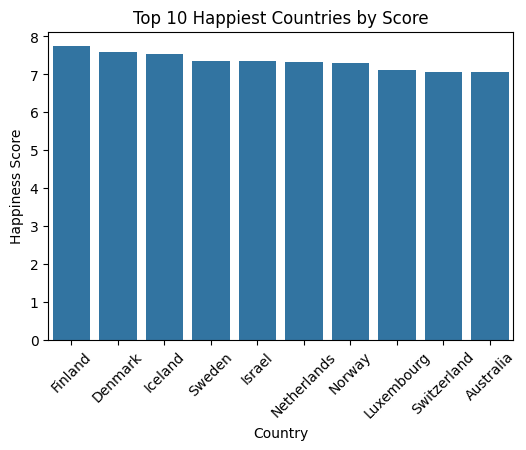

In [ ]:
happiest10=worldHappiness_df.sort_values(by='score', ascending=False).head(10)
plt.figure(figsize=(6,4))
sns.barplot(x='Country name', y='score', data=happiest10)
plt.title('Top 10 Happiest Countries by Score')
plt.xticks(rotation=45)
plt.xlabel('Country')
plt.ylabel('Happiness Score')
plt.show()

Line plot

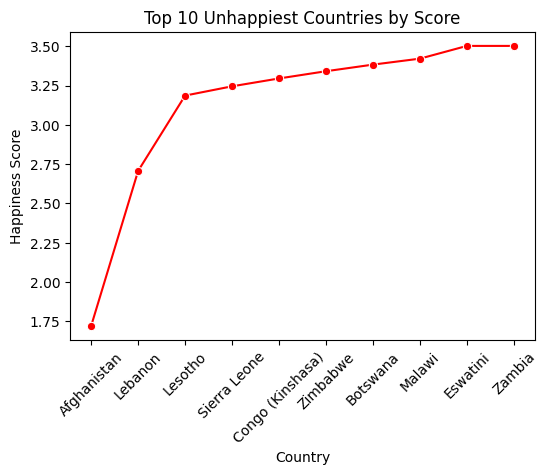

In [ ]:
unhappy10=worldHappiness_df.sort_values(by='score').head(10)
plt.figure(figsize=(6,4))
sns.lineplot(x='Country name', y='score', data=unhappy10, marker='o', color='red')
plt.title('Top 10 Unhappiest Countries by Score')
plt.xticks(rotation=45)
plt.xlabel('Country')
plt.ylabel('Happiness Score')
plt.show()

Plot a histogram

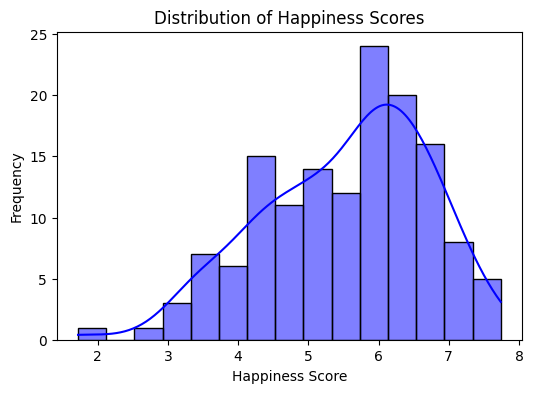

In [ ]:
plt.figure(figsize=(6, 4))
sns.histplot(worldHappiness_df['score'], bins=15, kde=True, color='blue')
plt.title('Distribution of Happiness Scores')
plt.xlabel('Happiness Score')
plt.ylabel('Frequency')
plt.show()

Scatter Plot

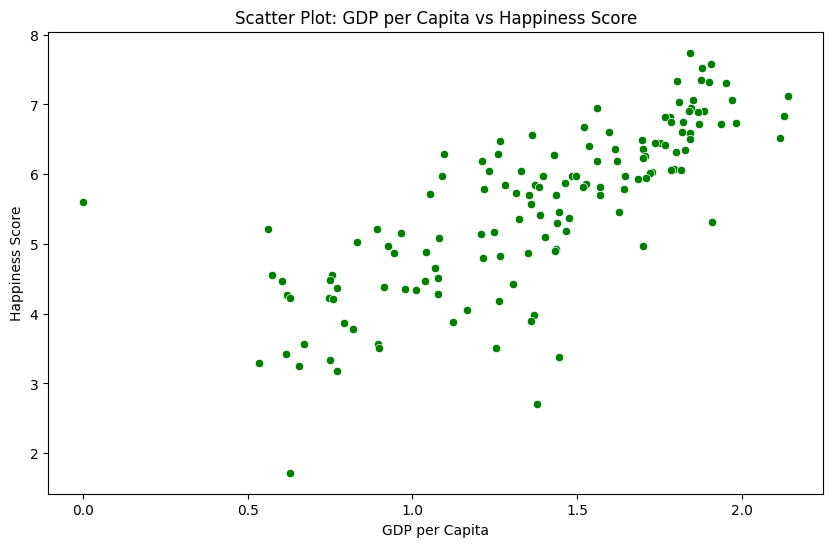

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Log GDP per capita', y='score', data=worldHappiness_df, color='green')
plt.title('Scatter Plot: GDP per Capita vs Happiness Score')
plt.xlabel('GDP per Capita')
plt.ylabel('Happiness Score')
plt.show()

**Problem - 2.Some Advance Data Exploration Task**

task-1

In [ ]:
south_asian_countries = ["Afghanistan", "Bangladesh", "Bhutan", "India", "Maldives", "Nepal", "Pakistan", "Sri Lanka"]
filtered_data = worldHappiness_df[worldHappiness_df['Country name'].isin(south_asian_countries)]

filtered_data.to_csv('south_asian_dataset.csv', index=False)
print("Done")

Done


Task-2


In [ ]:
south_asia_df = pd.read_csv('south_asian_dataset.csv')

In [ ]:
south_asia_df['Composite Score'] = (0.40 * south_asia_df['Log GDP per capita'] +
                                    0.30 * south_asia_df['Social support'] +
                                    0.30 * south_asia_df['Healthy life expectancy'])
south_asia_df.head()

,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,Happiness Category,Composite Score
0,Nepal,5.158,0.965,0.990,0.443,0.653,0.209,0.115,1.783,Medium,0.8159
1,Pakistan,4.657,1.069,0.600,0.321,0.542,0.144,0.074,1.907,Medium,0.7039
2,India,4.054,1.166,0.653,0.417,0.767,0.174,0.122,0.756,Medium,0.7874
3,Sri Lanka,3.898,1.361,1.179,0.586,0.583,0.144,0.031,0.014,Low,1.0739
4,Bangladesh,3.886,1.122,0.249,0.513,0.775,0.140,0.167,0.919,Low,0.6774


In [ ]:
south_asia_df = south_asia_df.sort_values(by='Composite Score', ascending=False)
south_asia_df.head()

,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,Happiness Category,Composite Score
3,Sri Lanka,3.898,1.361,1.179,0.586,0.583,0.144,0.031,0.014,Low,1.0739
0,Nepal,5.158,0.965,0.990,0.443,0.653,0.209,0.115,1.783,Medium,0.8159
2,India,4.054,1.166,0.653,0.417,0.767,0.174,0.122,0.756,Medium,0.7874
1,Pakistan,4.657,1.069,0.600,0.321,0.542,0.144,0.074,1.907,Medium,0.7039
4,Bangladesh,3.886,1.122,0.249,0.513,0.775,0.140,0.167,0.919,Low,0.6774


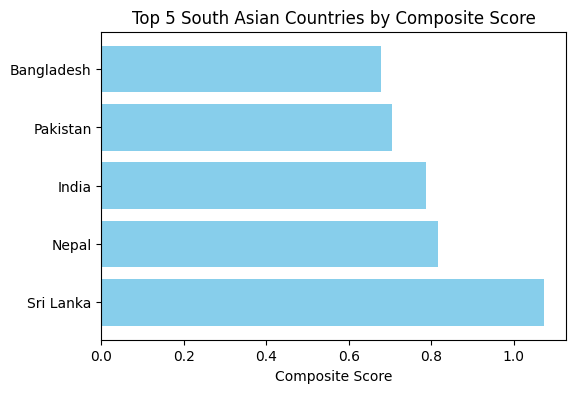

In [ ]:
top_5 = south_asia_df.head()
plt.figure(figsize=(6, 4))
plt.barh(top_5['Country name'], top_5['Composite Score'], color='skyblue')
plt.xlabel('Composite Score')
plt.title('Top 5 South Asian Countries by Composite Score')
plt.show()

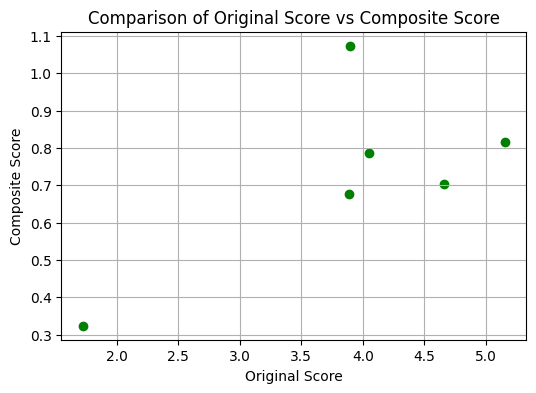

In [ ]:
plt.figure(figsize=(6, 4))
plt.scatter(south_asia_df['score'], south_asia_df['Composite Score'], color='green')
plt.xlabel('Original Score')
plt.ylabel('Composite Score')
plt.title('Comparison of Original Score vs Composite Score')
plt.grid()
plt.show()

A scatter plot was prepared for the OS and the CS as depicted in the following figure SET F. This distribution indicates that the two scores really and truly are correlated moderately positively but not perfectly. The fact that values of some of the waypoints differ slightly from the diagonal line proves that the ranking according to the Original Score and according to the Composite Score are not the same.

Observations
*   Aligned ranks: Countries with equivalent high or low ranks on both
ratings appear on the diagonal line of the graph.
*  The distances from the diagonal represent countries with Composite Scores that deviate significantly from the Original Score.
*    For instance, higher Composite Scores compared to Original Scores indicate a country's performance on weighted indicators such as GDP per capita, Social Support, and Healthy Life Expectancy.
*  Low score values, on the other hand, indicate poor performance in these indicators, as measured by the Composite Score of the Standard & Poor's index.





In [ ]:
alignment = south_asia_df[['Country name', 'score', 'Composite Score']]
print("Review the rankings:\n", alignment)

Review the rankings:
   Country name  score  Composite Score
3    Sri Lanka  3.898           1.0739
0        Nepal  5.158           0.8159
2        India  4.054           0.7874
1     Pakistan  4.657           0.7039
4   Bangladesh  3.886           0.6774
5  Afghanistan  1.721           0.3238


Task-3

In [ ]:
def detect_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

gdp_outliers, gdp_lower, gdp_upper = detect_outliers(south_asia_df, 'Log GDP per capita')
score_outliers, score_lower, score_upper = detect_outliers(south_asia_df, 'score')

In [ ]:
outliers = pd.concat([gdp_outliers, score_outliers]).drop_duplicates()

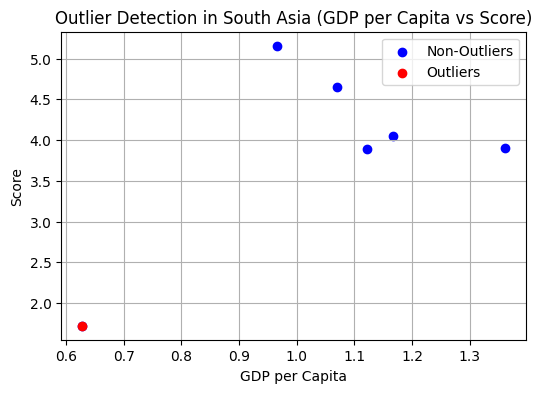

Outliers detected:
   Country name  Log GDP per capita  score
5  Afghanistan               0.628  1.721


In [ ]:
plt.figure(figsize=(6, 4))
plt.scatter(south_asia_df['Log GDP per capita'], south_asia_df['score'], color='blue', label='Non-Outliers')
plt.scatter(outliers['Log GDP per capita'], outliers['score'], color='red', label='Outliers')
plt.xlabel('GDP per Capita')
plt.ylabel('Score')
plt.title('Outlier Detection in South Asia (GDP per Capita vs Score)')
plt.legend()
plt.grid()
plt.show()

print("Outliers detected:\n", outliers[['Country name', 'Log GDP per capita', 'score']])

The scatter plot of occurrences, with significantly lower GDP per capita and Score, have displayed the outliers in red. These outgrowths are hence unfavorable, relatively poor, and socially deprived nations that negatively skew regional statistics and may inflate South Asia’s true development. By the higher range of GDP per capita and Score a larger range of possible performances is shown, showing the main and more non-outliers. Solving these challenges could bring back symmetry to regional factors and enhance favorable development dynamics.

Task-4

In [ ]:
metrics = ['Freedom to make life choices', 'Generosity']
for metric in metrics:
    corr, _ = pearsonr(south_asia_df[metric], south_asia_df['score'])
    print(f"Correlation between {metric} and Score: {corr:.2f}")

Correlation between Freedom to make life choices and Score: 0.80
Correlation between Generosity and Score: 0.87


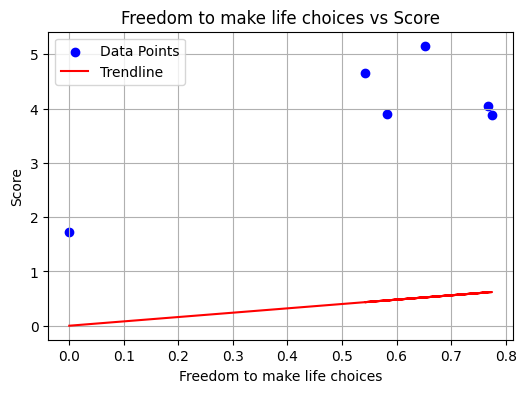

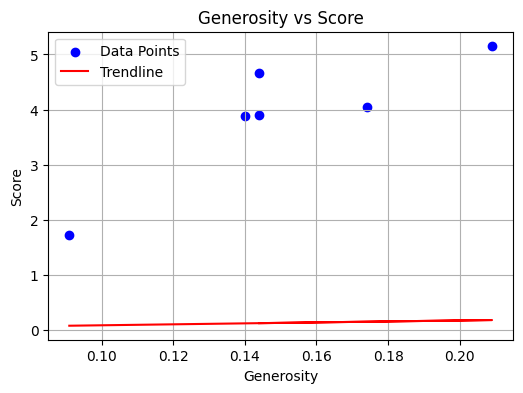

In [ ]:
for metric in metrics:
    plt.figure(figsize=(6, 4))
    plt.scatter(south_asia_df[metric], south_asia_df['score'], color='blue', label='Data Points')
    plt.plot(
        south_asia_df[metric],
        south_asia_df[metric] * pearsonr(south_asia_df[metric], south_asia_df['score'])[0],
        color='red',
        label='Trendline'
    )
    plt.title(f"{metric} vs Score")
    plt.xlabel(metric)
    plt.ylabel('Score')
    plt.legend()
    plt.grid(True)
    plt.show()

Top 3 countries with the largest positive gaps:
  Country name  GDP-Score Gap
5  Afghanistan         -1.093
3    Sri Lanka         -2.537
4   Bangladesh         -2.764

Top 3 countries with the largest negative gaps:
  Country name  GDP-Score Gap
0        Nepal         -4.193
1     Pakistan         -3.588
2        India         -2.888


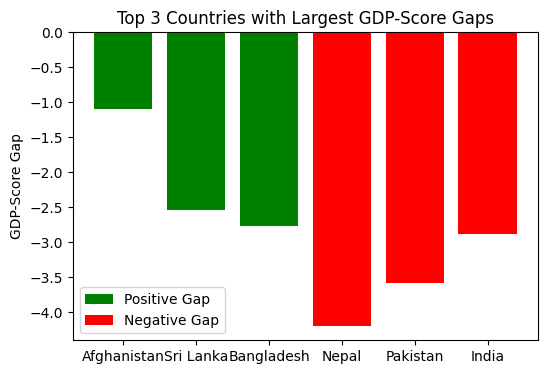

In [ ]:
south_asia_df['GDP-Score Gap'] = south_asia_df['Log GDP per capita'] - south_asia_df['score']

ranked_ascending = south_asia_df.sort_values(by='GDP-Score Gap', ascending=True)
ranked_descending = south_asia_df.sort_values(by='GDP-Score Gap', ascending=False)

print("Top 3 countries with the largest positive gaps:")
print(ranked_descending[['Country name', 'GDP-Score Gap']].head(3))

print("\nTop 3 countries with the largest negative gaps:")
print(ranked_ascending[['Country name', 'GDP-Score Gap']].head(3))

top_positive = ranked_descending[['Country name', 'GDP-Score Gap']].head(3)
top_negative = ranked_ascending[['Country name', 'GDP-Score Gap']].head(3)

plt.figure(figsize=(6, 4))
plt.bar(top_positive['Country name'], top_positive['GDP-Score Gap'], color='green', label='Positive Gap')
plt.bar(top_negative['Country name'], top_negative['GDP-Score Gap'], color='red', label='Negative Gap')
plt.title("Top 3 Countries with Largest GDP-Score Gaps")
plt.ylabel("GDP-Score Gap")
plt.legend()
plt.show()

In [ ]:
middle_east_countries = ["Bahrain", "Iran", "Iraq", "Israel", "Jordan", "Kuwait", "Lebanon", "Oman", "Palestine", "Qatar", "Saudi Arabia", "Syria", "United Arab Emirates", "Yemen"]
middle_east_df = worldHappiness_df[worldHappiness_df['Country name'].isin(middle_east_countries)]

south_asia_mean = south_asia_df['score'].mean()
south_asia_std = south_asia_df['score'].std()

middle_east_mean = middle_east_df['score'].mean()
middle_east_std = middle_east_df['score'].std()

print(f"South Asia - Mean Score: {south_asia_mean:.2f}, Std Dev: {south_asia_std:.2f}")
print(f"Middle East - Mean Score: {middle_east_mean:.2f}, Std Dev: {middle_east_std:.2f}")

# Comparision
if south_asia_mean > middle_east_mean:
    print("\nSouth Asia has a higher average happiness score.")
else:
    print("\nMiddle East has a higher average happiness score.")

South Asia - Mean Score: 3.90, Std Dev: 1.18
Middle East - Mean Score: 5.41, Std Dev: 1.57

Middle East has a higher average happiness score.


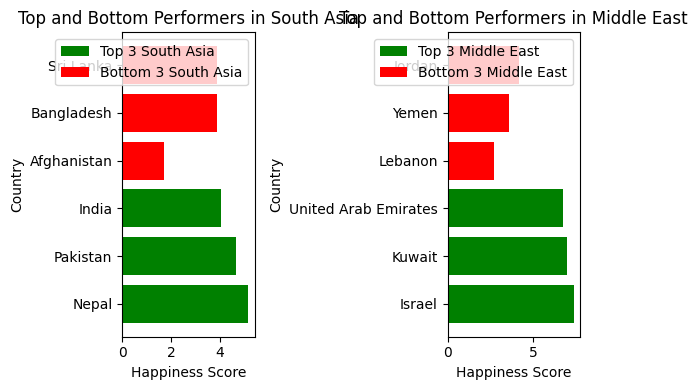

In [ ]:
top_3_south_asia = south_asia_df[['Country name', 'score']].sort_values(by='score', ascending=False).head(3)
bottom_3_south_asia = south_asia_df[['Country name', 'score']].sort_values(by='score').head(3)

top_3_middle_east = middle_east_df[['Country name', 'score']].sort_values(by='score', ascending=False).head(3)
bottom_3_middle_east = middle_east_df[['Country name', 'score']].sort_values(by='score').head(3)

plt.figure(figsize=(6, 4))

plt.subplot(1, 2, 1)
plt.barh(top_3_south_asia['Country name'], top_3_south_asia['score'], color='green', label='Top 3 South Asia')
plt.barh(bottom_3_south_asia['Country name'], bottom_3_south_asia['score'], color='red', label='Bottom 3 South Asia')
plt.title("Top and Bottom Performers in South Asia")
plt.xlabel("Happiness Score")
plt.ylabel("Country")
plt.legend()

plt.subplot(1, 2, 2)
plt.barh(top_3_middle_east['Country name'], top_3_middle_east['score'], color='green', label='Top 3 Middle East')
plt.barh(bottom_3_middle_east['Country name'], bottom_3_middle_east['score'], color='red', label='Bottom 3 Middle East')
plt.title("Top and Bottom Performers in Middle East")
plt.xlabel("Happiness Score")
plt.ylabel("Country")
plt.legend()

plt.tight_layout()
plt.show()

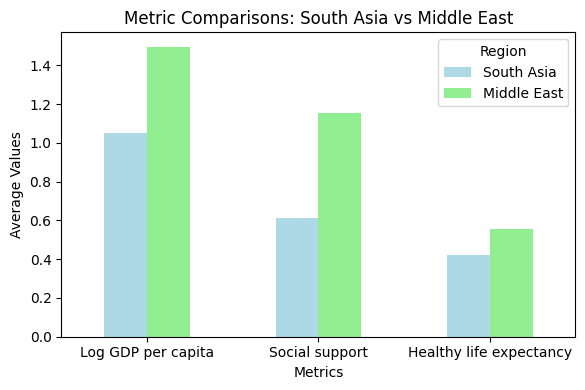


Disparity between South Asia and Middle East for each metric:
Log GDP per capita         0.444500
Social support             0.540944
Healthy life expectancy    0.133778
dtype: float64


In [ ]:
south_asia_metrics = south_asia_df[['Log GDP per capita', 'Social support', 'Healthy life expectancy']].mean()
middle_east_metrics = middle_east_df[['Log GDP per capita', 'Social support', 'Healthy life expectancy']].mean()

metrics_comparison = pd.DataFrame({
    'South Asia': south_asia_metrics,
    'Middle East': middle_east_metrics
})

metrics_comparison.plot(kind='bar', figsize=(6, 4), color=['lightblue', 'lightgreen'])
plt.title("Metric Comparisons: South Asia vs Middle East")
plt.ylabel("Average Values")
plt.xlabel("Metrics")
plt.xticks(rotation=0)
plt.legend(title="Region")
plt.tight_layout()
plt.show()

disparity = metrics_comparison['Middle East'] - metrics_comparison['South Asia']
print("\nDisparity between South Asia and Middle East for each metric:")
print(disparity)

In [ ]:
south_asia_range = south_asia_df['score'].max() - south_asia_df['score'].min()
middle_east_range = middle_east_df['score'].max() - middle_east_df['score'].min()

south_asia_cv = south_asia_df['score'].std() / south_asia_df['score'].mean() * 100
middle_east_cv = middle_east_df['score'].std() / middle_east_df['score'].mean() * 100

print(f"South Asia - Range: {south_asia_range:.2f}, Coefficient of Variation (CV): {south_asia_cv:.2f}%")
print(f"Middle East - Range: {middle_east_range:.2f}, Coefficient of Variation (CV): {middle_east_cv:.2f}%")

if south_asia_cv > middle_east_cv:
    print("\nSouth Asia has greater variability in happiness.")
else:
    print("\nMiddle East has greater variability in happiness.")

South Asia - Range: 3.44, Coefficient of Variation (CV): 30.21%
Middle East - Range: 4.63, Coefficient of Variation (CV): 28.94%

South Asia has greater variability in happiness.


South Asia - Correlation with Freedom to Make Life Choices: 0.80
South Asia - Correlation with Generosity: 0.87
Middle East - Correlation with Freedom to Make Life Choices: 0.86
Middle East - Correlation with Generosity: 0.63


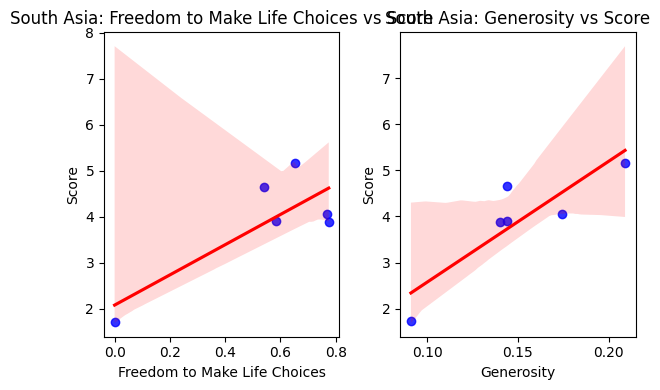

In [ ]:
south_asia_corr_freedom = south_asia_df[['score', 'Freedom to make life choices']].corr().iloc[0, 1]
south_asia_corr_generosity = south_asia_df[['score', 'Generosity']].corr().iloc[0, 1]

middle_east_corr_freedom = middle_east_df[['score', 'Freedom to make life choices']].corr().iloc[0, 1]
middle_east_corr_generosity = middle_east_df[['score', 'Generosity']].corr().iloc[0, 1]

print(f"South Asia - Correlation with Freedom to Make Life Choices: {south_asia_corr_freedom:.2f}")
print(f"South Asia - Correlation with Generosity: {south_asia_corr_generosity:.2f}")
print(f"Middle East - Correlation with Freedom to Make Life Choices: {middle_east_corr_freedom:.2f}")
print(f"Middle East - Correlation with Generosity: {middle_east_corr_generosity:.2f}")

plt.figure(figsize=(6, 4))

plt.subplot(1, 2, 1)
sns.regplot(x='Freedom to make life choices', y='score', data=south_asia_df, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})
plt.title("South Asia: Freedom to Make Life Choices vs Score")
plt.xlabel('Freedom to Make Life Choices')
plt.ylabel('Score')

plt.subplot(1, 2, 2)
sns.regplot(x='Generosity', y='score', data=south_asia_df, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})
plt.title("South Asia: Generosity vs Score")
plt.xlabel('Generosity')
plt.ylabel('Score')

plt.tight_layout()
plt.show()

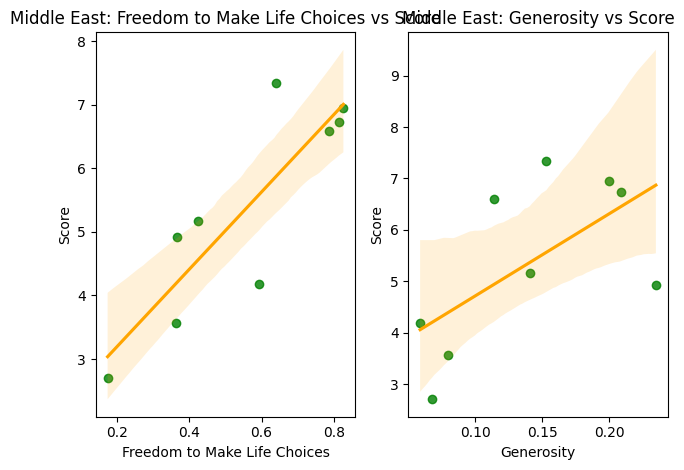

In [ ]:
plt.subplot(1, 2, 1)
sns.regplot(x='Freedom to make life choices', y='score', data=middle_east_df, scatter_kws={'color': 'green'}, line_kws={'color': 'orange'})
plt.title("Middle East: Freedom to Make Life Choices vs Score")
plt.xlabel('Freedom to Make Life Choices')
plt.ylabel('Score')

plt.subplot(1, 2, 2)
sns.regplot(x='Generosity', y='score', data=middle_east_df, scatter_kws={'color': 'green'}, line_kws={'color': 'orange'})
plt.title("Middle East: Generosity vs Score")
plt.xlabel('Generosity')
plt.ylabel('Score')

plt.tight_layout()
plt.show()

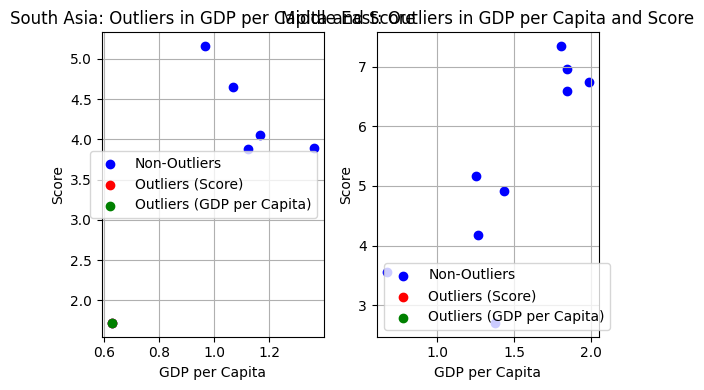

South Asia Outliers based on Score and GDP per Capita:
  Country name  score  Log GDP per capita
5  Afghanistan  1.721               0.628
  Country name  score  Log GDP per capita
5  Afghanistan  1.721               0.628

Middle East Outliers based on Score and GDP per Capita:
Empty DataFrame
Columns: [Country name, score, Log GDP per capita]
Index: []
Empty DataFrame
Columns: [Country name, score, Log GDP per capita]
Index: []


In [ ]:
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]

south_asia_outliers_score = detect_outliers(south_asia_df, 'score')
south_asia_outliers_gdp = detect_outliers(south_asia_df, 'Log GDP per capita')

middle_east_outliers_score = detect_outliers(middle_east_df, 'score')
middle_east_outliers_gdp = detect_outliers(middle_east_df, 'Log GDP per capita')

plt.figure(figsize=(6, 4))

plt.subplot(1, 2, 1)
plt.scatter(south_asia_df['Log GDP per capita'], south_asia_df['score'], color='blue', label='Non-Outliers')
plt.scatter(south_asia_outliers_score['Log GDP per capita'], south_asia_outliers_score['score'], color='red', label='Outliers (Score)')
plt.scatter(south_asia_outliers_gdp['Log GDP per capita'], south_asia_outliers_gdp['score'], color='green', label='Outliers (GDP per Capita)')
plt.title("South Asia: Outliers in GDP per Capita and Score")
plt.xlabel('GDP per Capita')
plt.ylabel('Score')
plt.legend()
plt.grid()

plt.subplot(1, 2, 2)
plt.scatter(middle_east_df['Log GDP per capita'], middle_east_df['score'], color='blue', label='Non-Outliers')
plt.scatter(middle_east_outliers_score['Log GDP per capita'], middle_east_outliers_score['score'], color='red', label='Outliers (Score)')
plt.scatter(middle_east_outliers_gdp['Log GDP per capita'], middle_east_outliers_gdp['score'], color='green', label='Outliers (GDP per Capita)')
plt.title("Middle East: Outliers in GDP per Capita and Score")
plt.xlabel('GDP per Capita')
plt.ylabel('Score')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

print("South Asia Outliers based on Score and GDP per Capita:")
print(south_asia_outliers_score[['Country name', 'score', 'Log GDP per capita']])
print(south_asia_outliers_gdp[['Country name', 'score', 'Log GDP per capita']])

print("\nMiddle East Outliers based on Score and GDP per Capita:")
print(middle_east_outliers_score[['Country name', 'score', 'Log GDP per capita']])
print(middle_east_outliers_gdp[['Country name', 'score', 'Log GDP per capita']])

<ipython-input-74-f13c4565d4bc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  middle_east_df['Region'] = 'Middle East'
<ipython-input-74-f13c4565d4bc>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Region', y='score', data=combined_df, palette='Set2')


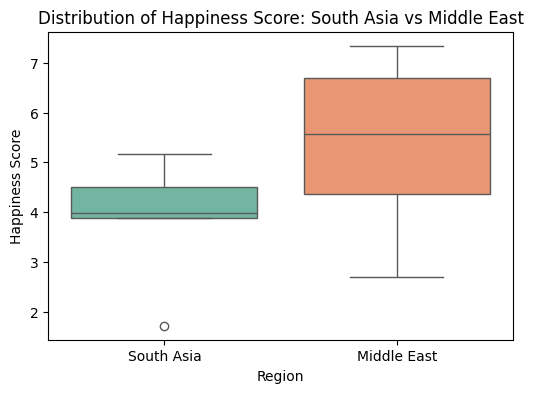

In [ ]:
south_asia_df['Region'] = 'South Asia'
middle_east_df['Region'] = 'Middle East'

combined_df = pd.concat([south_asia_df[['score', 'Region']], middle_east_df[['score', 'Region']]])

plt.figure(figsize=(6, 4))
sns.boxplot(x='Region', y='score', data=combined_df, palette='Set2')

plt.title("Distribution of Happiness Score: South Asia vs Middle East")
plt.xlabel('Region')
plt.ylabel('Happiness Score')

plt.show()